# Imports bb

In [3]:
import matplotlib.pylab as pl
from pyvis.network import Network
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import json

# Formatting Data

In [4]:
card_graph = {}
with open ('./data/top_10k_player_decks.json') as file: # 18,051 decks in dataset
    card_graph = json.load(file)

card_occurances = {k: v for k,v in card_graph.items()}

edges = pd.DataFrame(
    {
        "source": [e for k,v in card_occurances.items() for e,w in v['edges'].items()],
        "target": [k for k,v in card_occurances.items() for e,w in v['edges'].items()],
        "weight": [w for k,v in card_occurances.items() for e,w in v['edges'].items()],
        # "color": ["red", "blue", "blue"],
    }
)

G = nx.from_pandas_edgelist(edges,
source='source',
target='target',
edge_attr='weight')

G

In [5]:
adj = pd.read_csv('./data/top_10k_player_decks_adj_matrix.csv')
adj.index = adj['Unnamed: 0'].values
adj = adj.drop(['Unnamed: 0'], axis=1)
adj = adj.replace(0, np.NaN)
adj

Archer Queen  Archers  Arrows  Baby Dragon  Balloon  Bandit  \
Archer Queen           NaN      1.0   167.0         37.0     31.0   178.0   
Archers                1.0      NaN    68.0          7.0     13.0     4.0   
Arrows               167.0     68.0     NaN        141.0    322.0    65.0   
Baby Dragon           37.0      7.0   141.0          NaN    217.0    68.0   
Balloon               31.0     13.0   322.0        217.0      NaN    14.0   
...                    ...      ...     ...          ...      ...     ...   
Witch                  NaN      NaN   150.0          4.0     13.0     3.0   
Wizard                 NaN      NaN    13.0          1.0     16.0     5.0   
X-Bow                196.0    278.0     NaN          1.0      NaN     3.0   
Zap                  147.0     41.0   739.0        148.0    626.0   613.0   
Zappies               50.0      1.0   571.0         60.0     18.0    14.0   

              Barbarian Barrel  Barbarian Hut  Barbarians   Bats  ...  \
Archer Queen             142.0            NaN        35.0  163.0  ...   
Archers                   30.0            1.0         8.0   31.0  ...   
Arrows                   205.0            3.0       273.0  488.0  ...   
Baby Dragon             1088.0           51.0        49.0  177.0  ...   
Balloon                  395.0            2.0       296.0  144.0  ...   
...                        ...            ...         ...    ...  ...   
Witch                      8.0            NaN         8.0   52.0  ...   
Wizard                     2.0            NaN        18.0   14.0  ...   
X-Bow                      2.0            1.0        13.0    8.0  ...   
Zap                      127.0            2.0       344.0  683.0  ...   
Zappies                  298.0            2.0        33.0   37.0  ...   

              Three Musketeers  Tombstone  Tornado  Valkyrie  Wall Breakers  \
Archer Queen              12.0       41.0    372.0     396.0           66.0   
Archers                    NaN       38.0     82.0     132.0            4.0   
Arrows                    18.0      511.0     92.0     225.0           54.0   
Baby Dragon                2.0      561.0   1483.0     220.0            NaN   
Balloon                    NaN      356.0    477.0     163.0            1.0   
...                        ...        ...      ...       ...            ...   
Witch                      NaN       11.0     31.0      11.0            2.0   
Wizard                     2.0        3.0     32.0      11.0            1.0   
X-Bow                      NaN        1.0    134.0     125.0            NaN   
Zap                      188.0      352.0    335.0     143.0          177.0   
Zappies                    8.0      440.0    265.0     110.0            5.0   

              Witch  Wizard  X-Bow    Zap  Zappies  
Archer Queen    NaN     NaN  196.0  147.0     50.0  
Archers         NaN     NaN  278.0   41.0      1.0  
Arrows        150.0    13.0    NaN  739.0    571.0  
Baby Dragon     4.0     1.0    1.0  148.0     60.0  
Balloon        13.0    16.0    NaN  626.0     18.0  
...             ...     ...    ...    ...      ...  
Witch           NaN     4.0    NaN   57.0     22.0  
Wizard          4.0     NaN    NaN   42.0      NaN  
X-Bow           NaN     NaN    NaN    4.0      1.0  
Zap            57.0    42.0    4.0    NaN     78.0  
Zappies        22.0     NaN    1.0   78.0      NaN  

[107 rows x 107 columns]

In [16]:
# Converting from adjacency matrix to edge list (still goes archer -> archer queen and archer queen -> archer) this is fine because we need to do it by frequency anyways
el = adj
el.values[[np.arange(len(el))]*2]# = np.NaN
el = el.stack().reset_index()
el = el.rename({'level_0': "source", 'level_1': "target", 0: 'weight'}, axis=1) # is currently a double sided raw frequency count



/var/folders/9h/6fhghpsx3tv0tjcyk0lknrs40000gn/T/ipykernel_40774/61535735.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  el.values[[np.arange(len(el))]*2]# = np.NaN


# Plotting

## Looking at Card Frequencies (node degree)

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


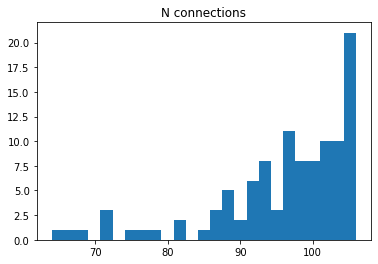

In [6]:
degs = nx.laplacian_matrix(G, weight=None).diagonal()
plt.title('N connections')
plt.hist(degs, bins=25)
plt.show()

# adj.sum(axis=1).sort_values().plot.barh(figsize=(20,20), ) # plots edge weights

## Graph Visualizations

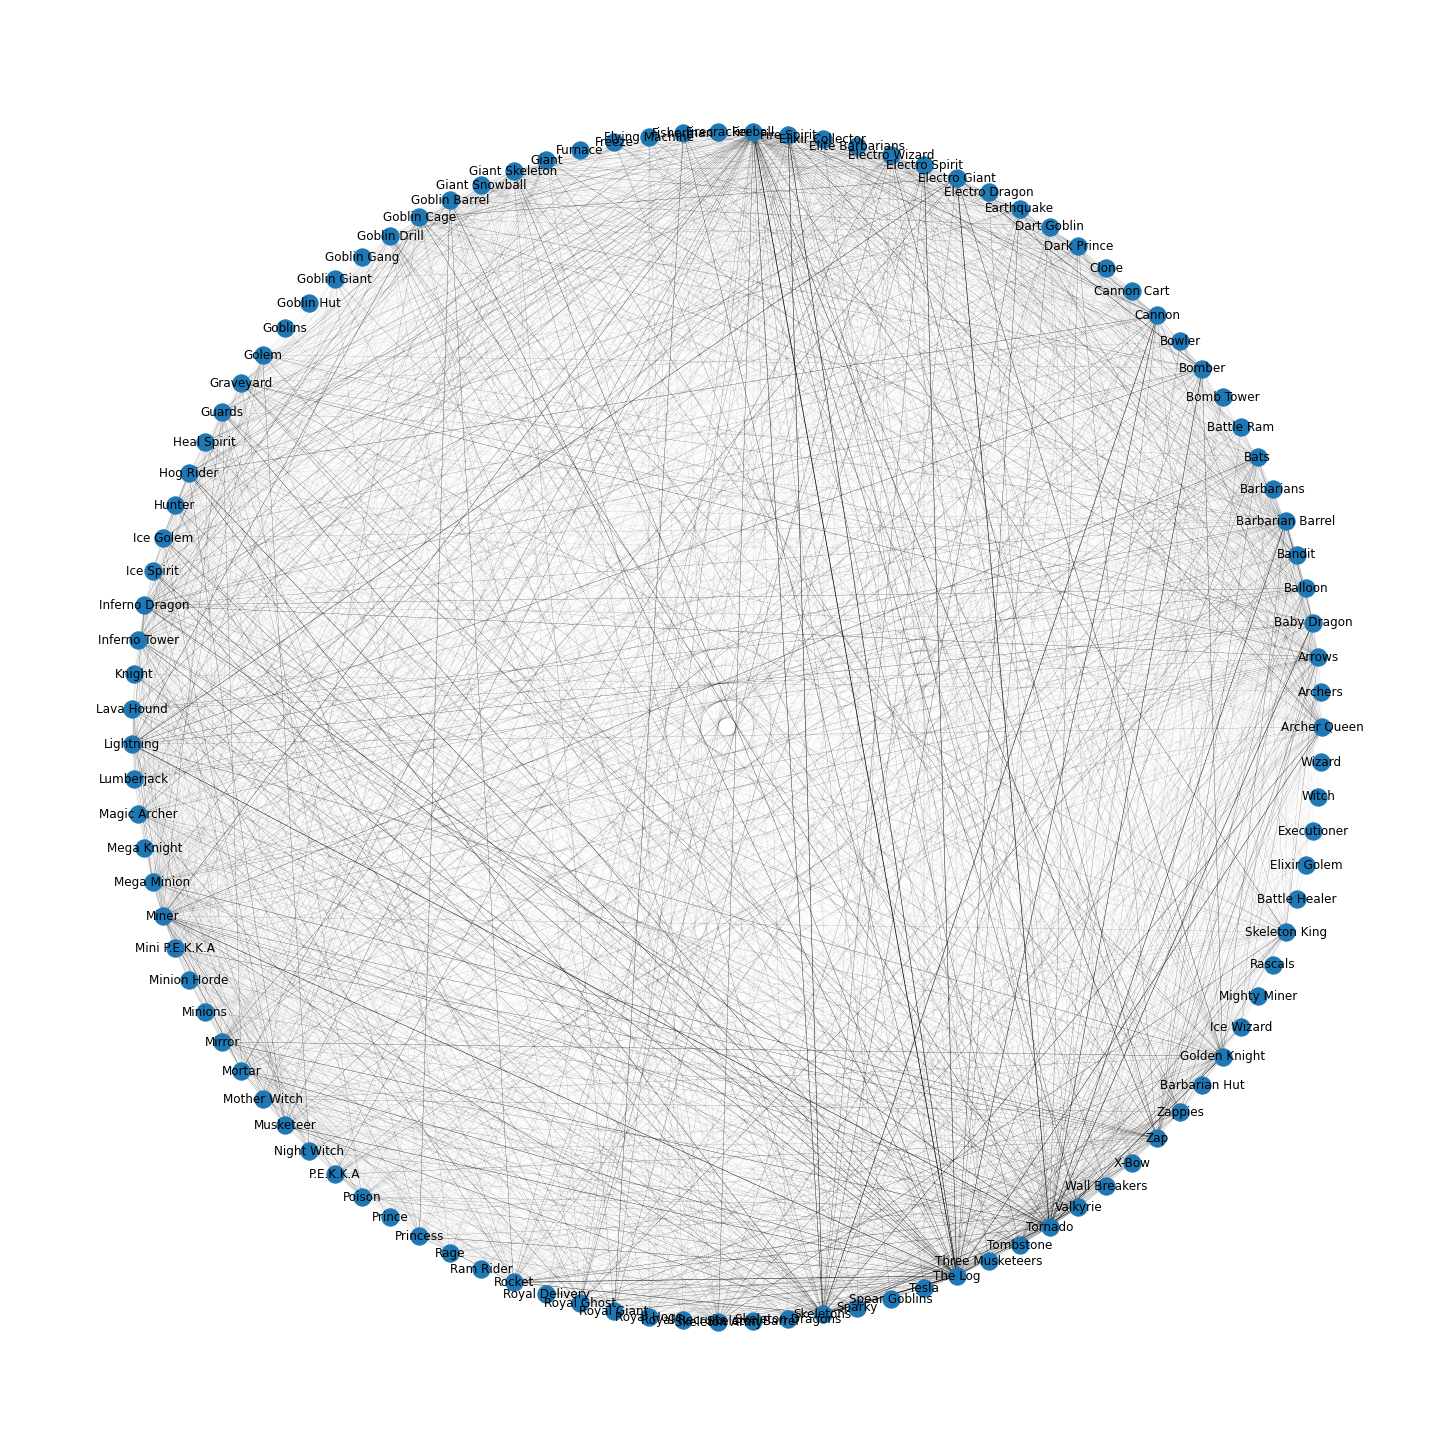

In [38]:
pl.figure(figsize=(20,20))

G = nx.from_pandas_edgelist(el, edge_attr='weight')
wts = np.array([i['weight'] for i in dict(G.edges).values()])
nx.draw_circular(G, width=wts/max(wts), with_labels=True)

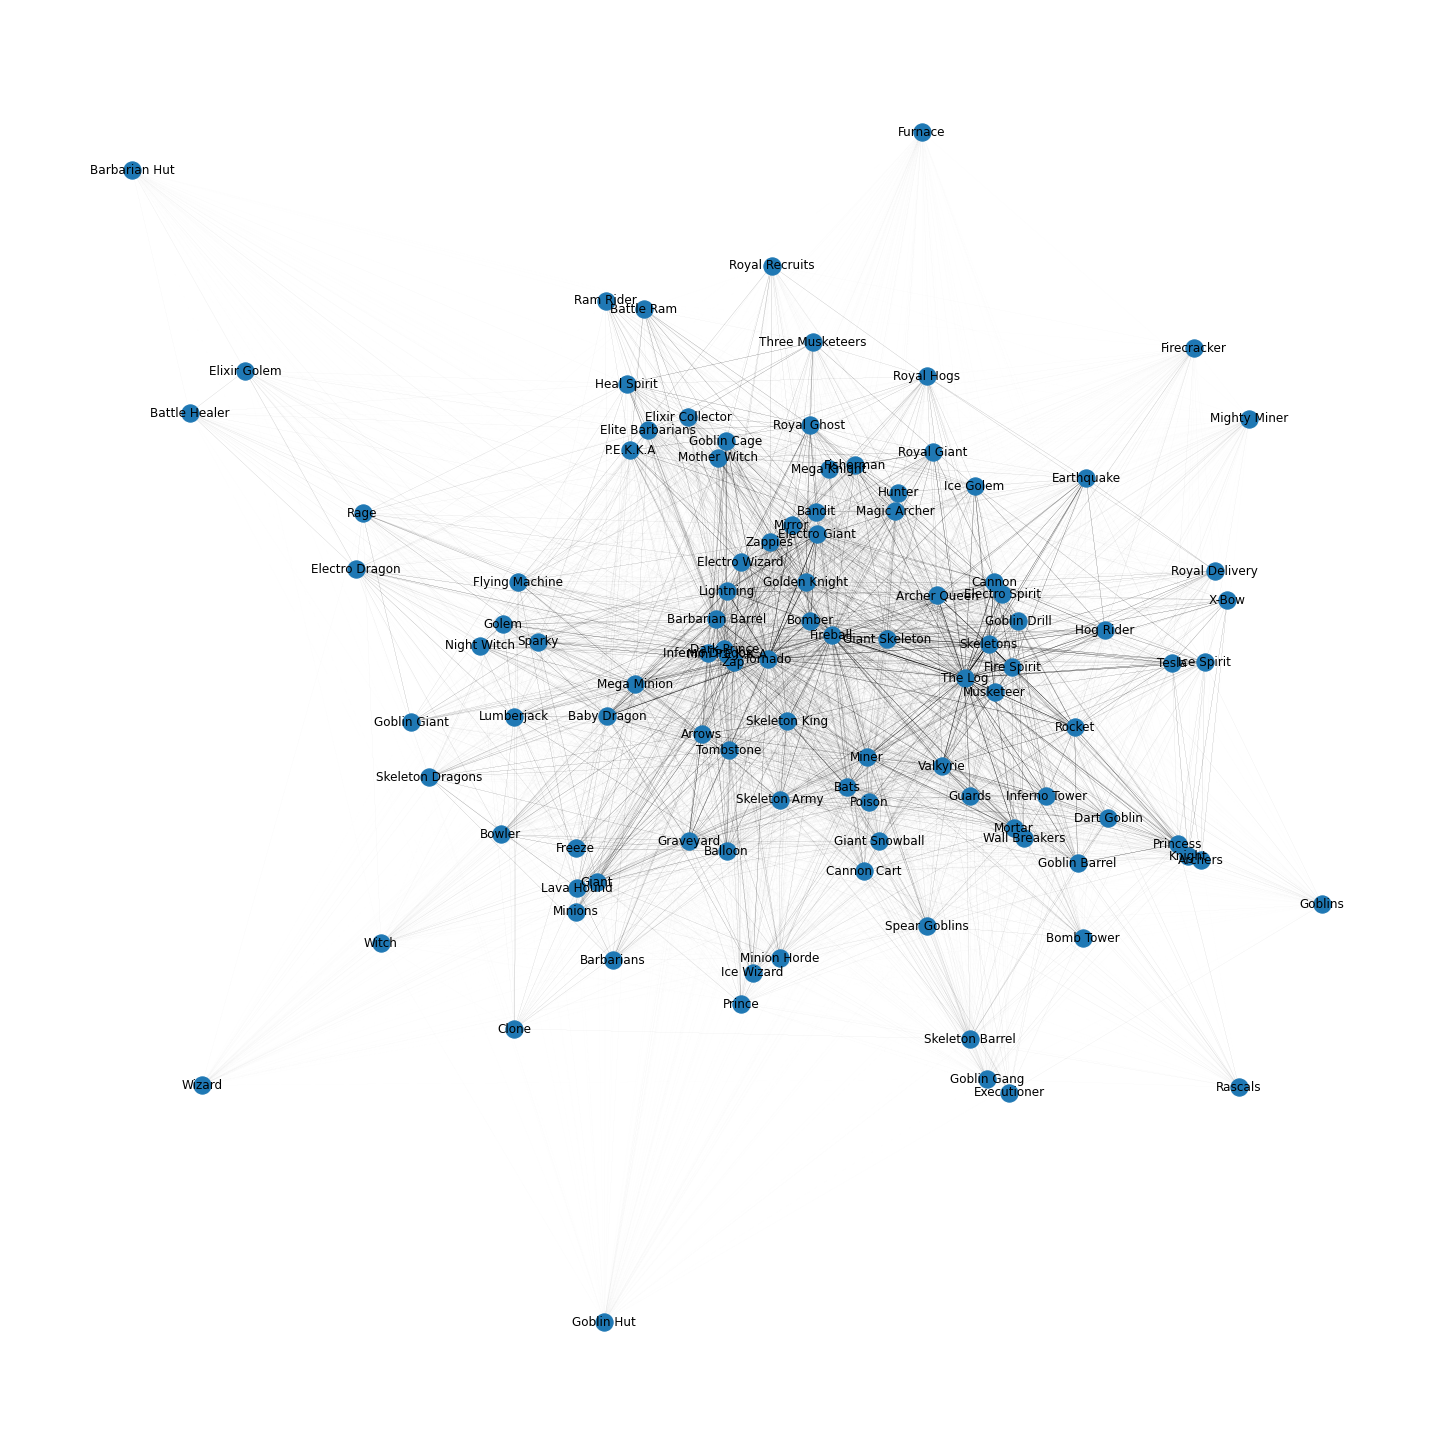

In [41]:
pl.figure(figsize=(20,20))
# nx.draw_spring(G, width=(wts/max(wts)), with_labels=True)
nx.draw_spring(G, width=(wts/max(wts)), with_labels=True)

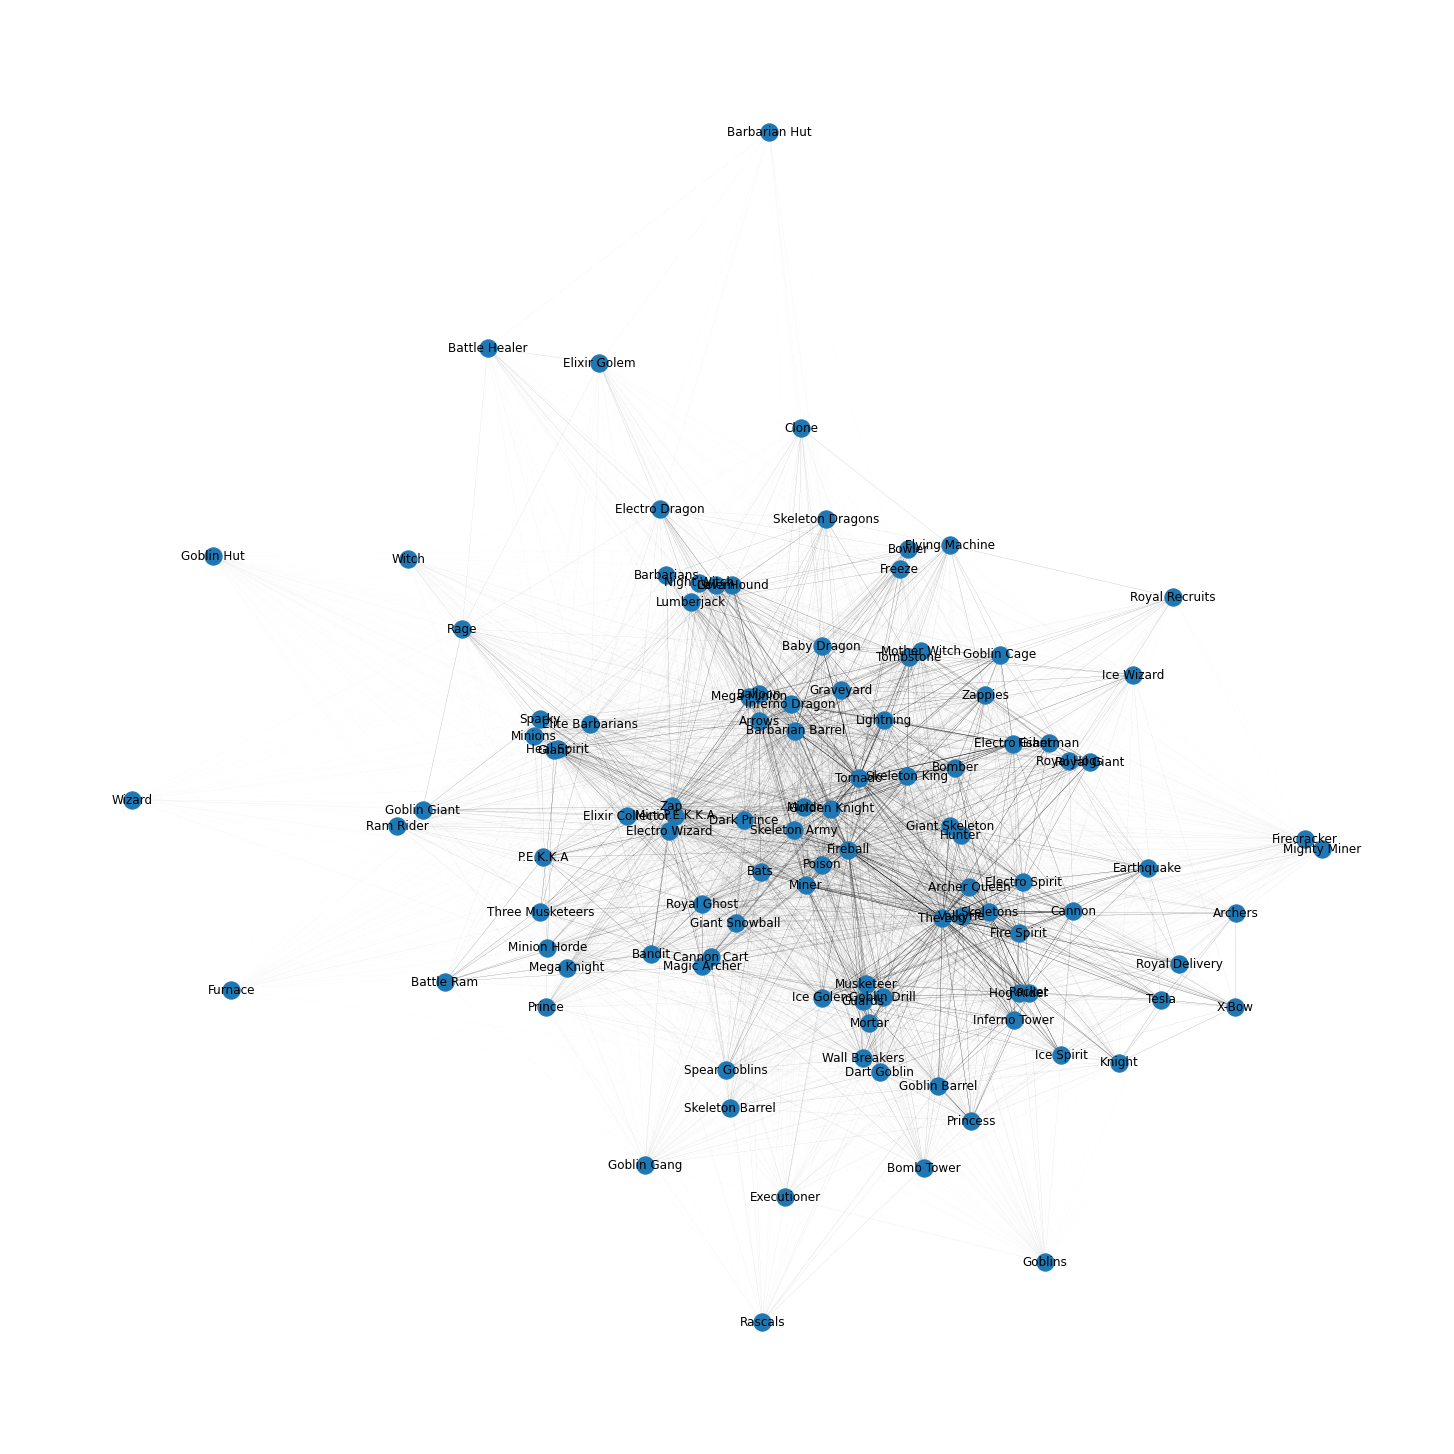

In [49]:
pl.figure(figsize=(20,20))
# nx.draw_kamada_kawai_layout(G, width=wts/max(wts), with_labels=True)
pos = nx.spring_layout(G, iterations=10000)
nx.draw(G, width=(wts/max(wts)), pos=pos, with_labels=True)

# Normalizing Data

## Method 1: Changing each connection from number of times used together to number of times seen (bi directional)

In [53]:
# CArd weights calculation

cardlist = pd.unique(el.source)
percent_el = pd.DataFrame({'source':[], 'target': [], 'weight':[]})
i = 0
for card in cardlist:
    card_total_uses = sum(el[el.source == card].weight) # how many times card was used total
    for other_card in cardlist:
        if card != other_card:
            i += 1
            edge = el[el.source == card]
            edge = edge[edge.target == other_card]
            weight = edge.weight

            other_percent_uses = weight / card_total_uses 
            percent_el = percent_el.append(pd.DataFrame({'source': card, 'target': other_card, 'weight': other_percent_uses}))

            print('percent finished:', i / len(el), end='\r') # idk why this is wrong but el and percent el come out the same length


<BarContainer object of 104 artists>

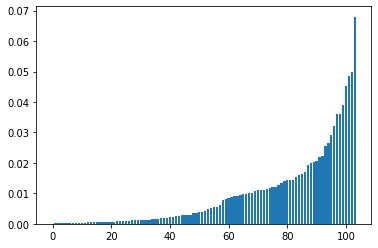

In [54]:
aq = percent_el[percent_el.source=='Miner']
aq = aq.sort_values('weight')['weight']
plt.bar([i for i in range(len(aq))], aq)

<BarContainer object of 107 artists>

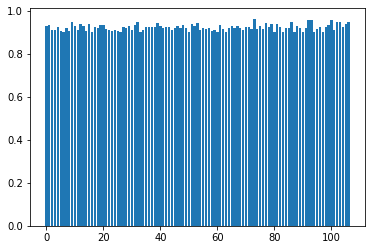

In [55]:
plt.bar([i for i in range(len(list(nx.clustering(G).values())))], list(nx.clustering(G).values()))

In [56]:
percent_el

source         target    weight
0      Archer Queen        Archers  0.000070
1      Archer Queen         Arrows  0.011621
2      Archer Queen    Baby Dragon  0.002575
3      Archer Queen        Balloon  0.002157
4      Archer Queen         Bandit  0.012386
...             ...            ...       ...
10263       Zappies       Valkyrie  0.009821
10264       Zappies  Wall Breakers  0.000446
10265       Zappies          Witch  0.001964
10266       Zappies          X-Bow  0.000089
10267       Zappies            Zap  0.006964

[10268 rows x 3 columns]

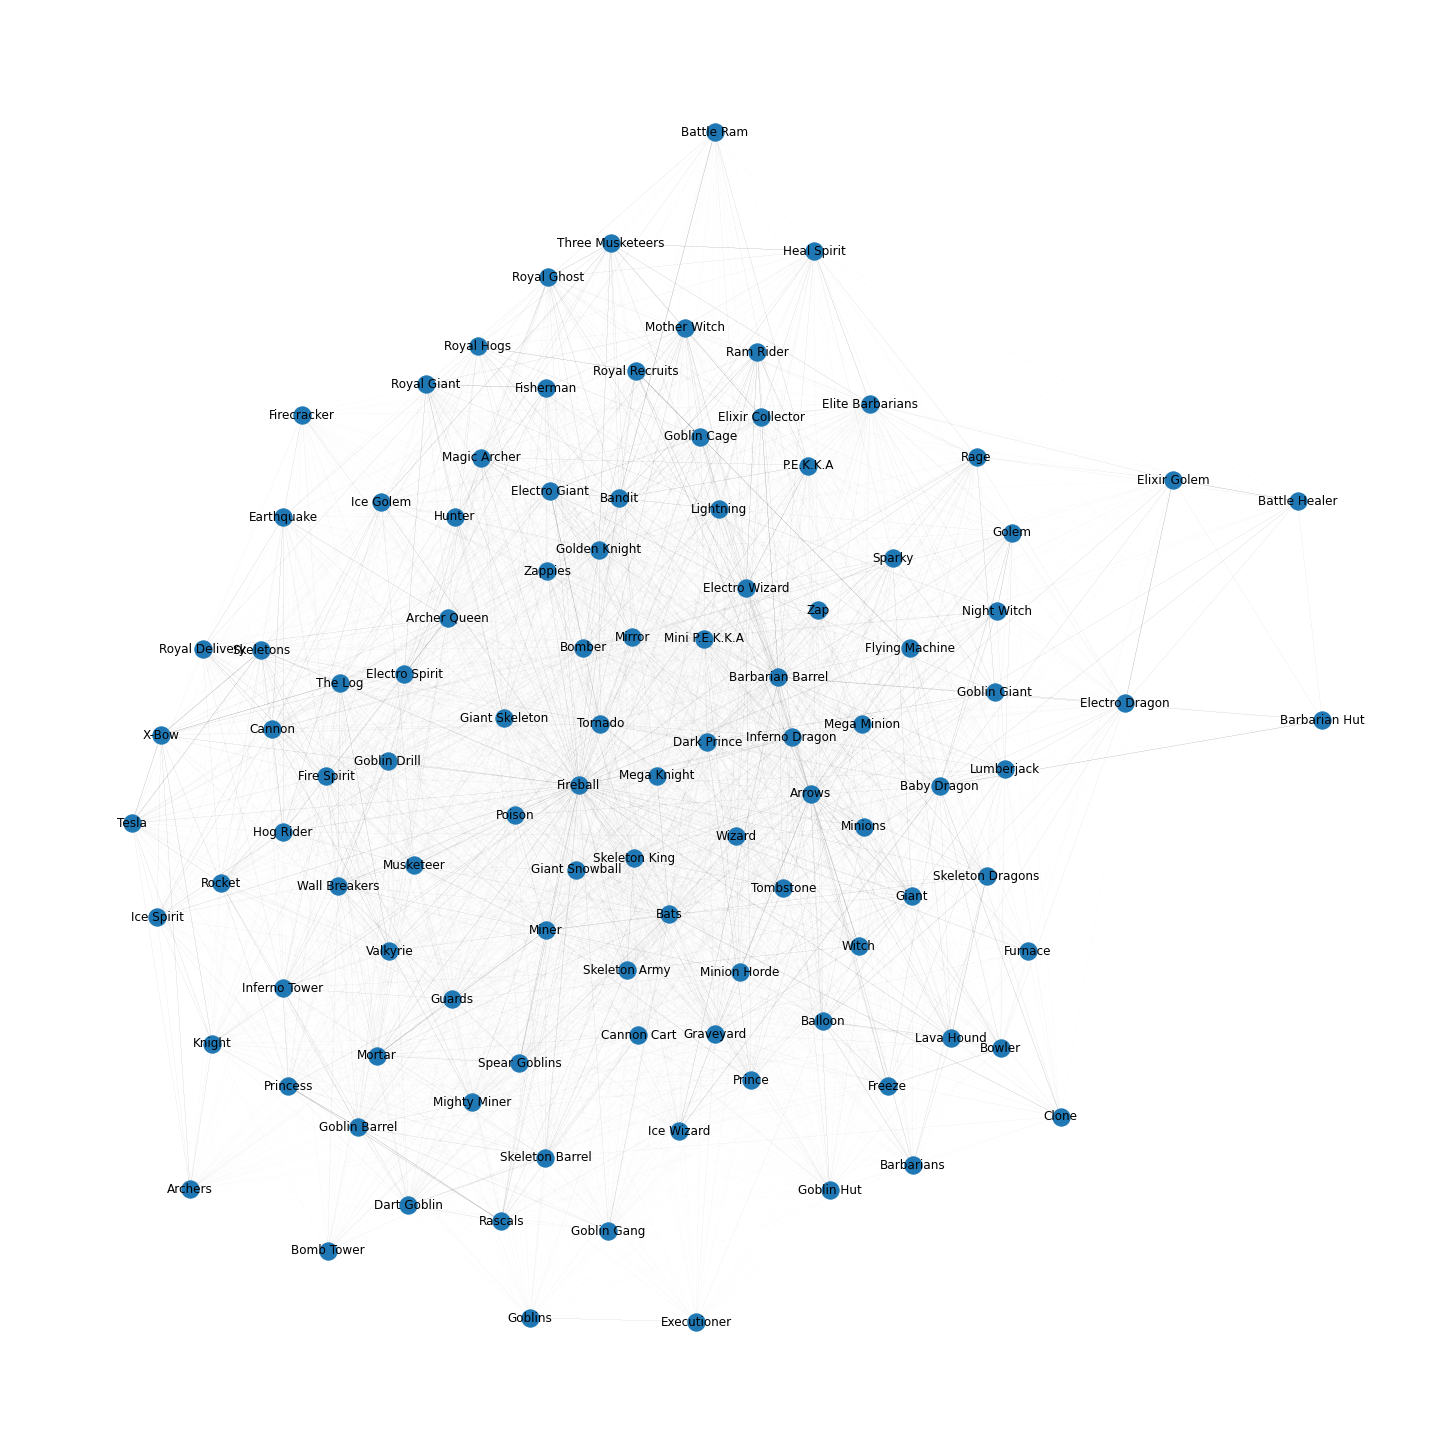

In [57]:
G2 = nx.from_pandas_edgelist(percent_el, edge_attr='weight')
wts = np.array([i['weight'] for i in dict(G2.edges).values()])

pl.figure(figsize=(20,20))
pos = nx.spring_layout(G2, iterations=10000)
nx.draw(G2, width=(wts), pos=pos, with_labels=True)

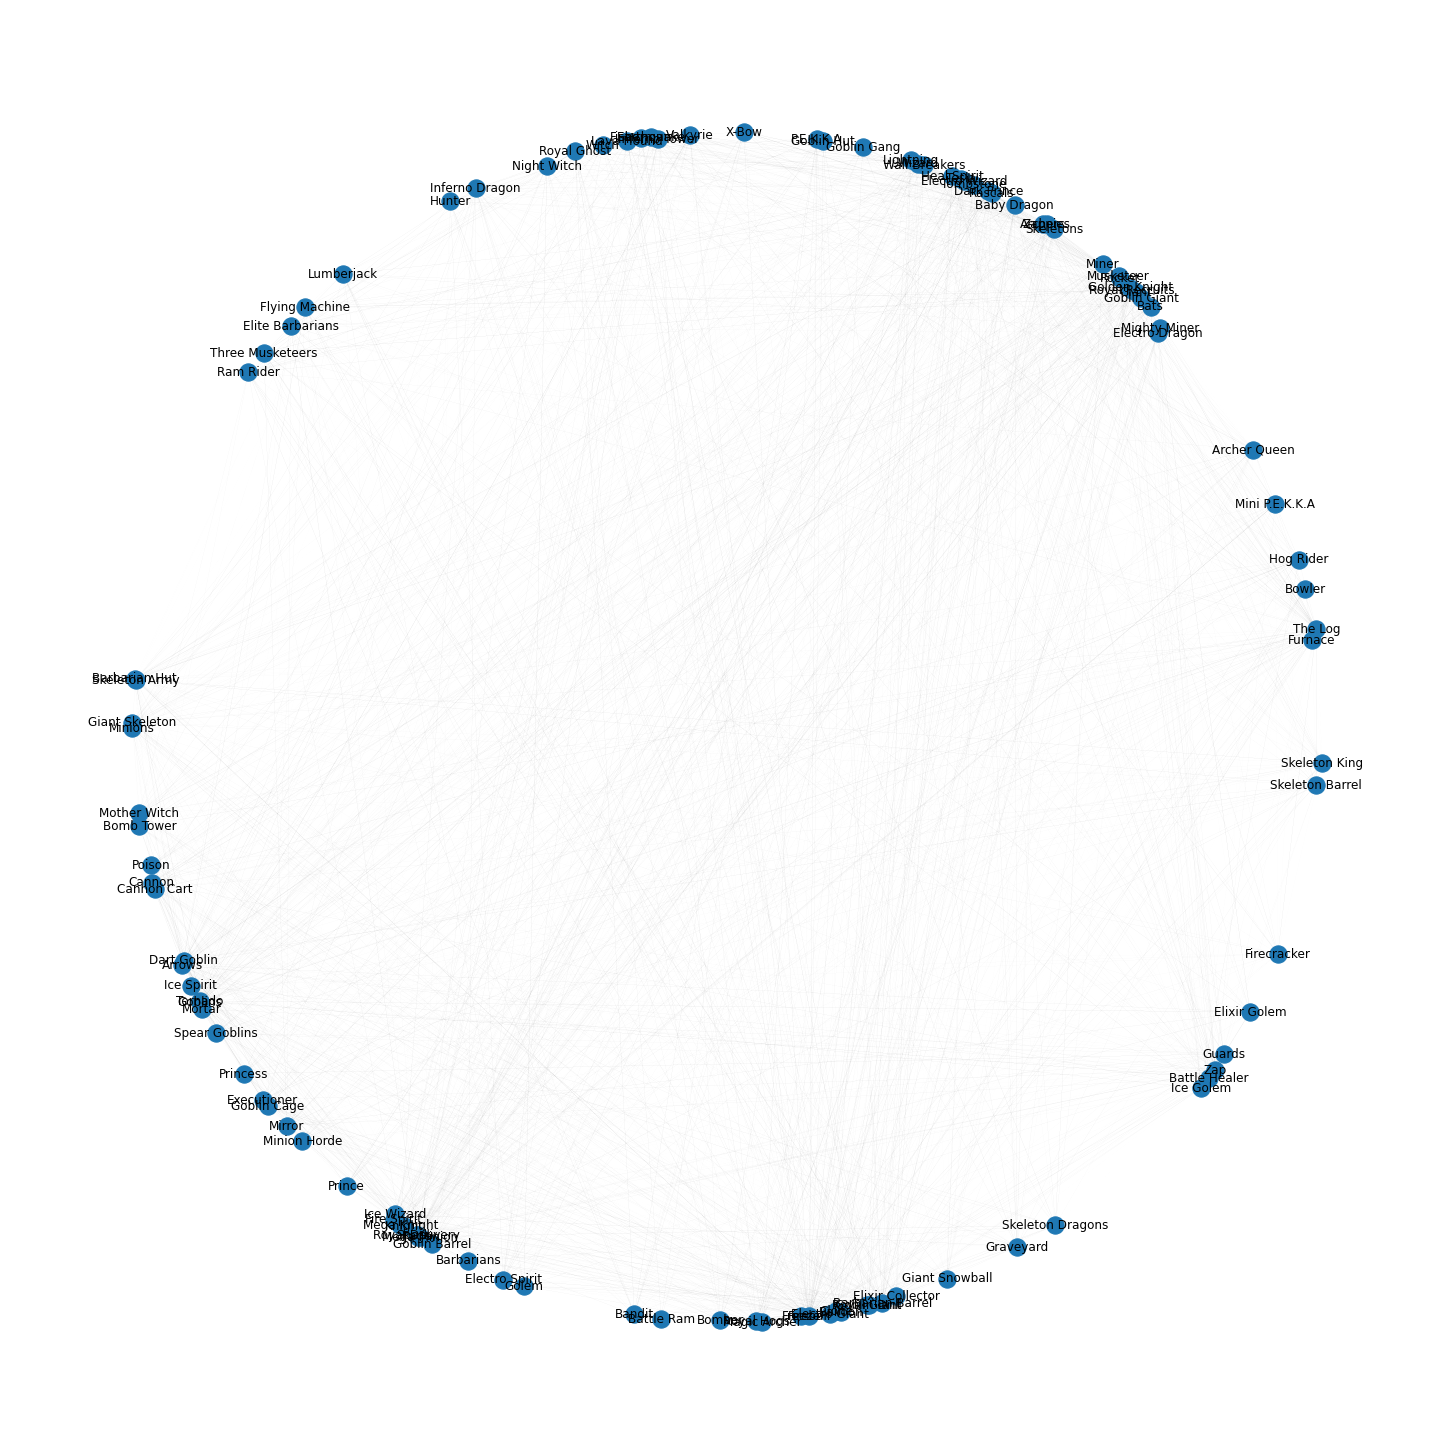

In [70]:
# removing connections with weights lower than 25th percentile
lower_bound = percent_el.quantile(0.75).weight
pruned_el = percent_el[percent_el.weight >= lower_bound]
pruned_el.weight = np.log(pruned_el.weight * 100) * -1

# new graph with new weights
G3 = nx.from_pandas_edgelist(pruned_el, edge_attr='weight')
wts = np.array([i['weight'] for i in dict(G3.edges).values()])

# plotting
pl.figure(figsize=(20,20))
pos = nx.spring_layout(G3, iterations=5000)
nx.draw(G3, width=(wts/80), pos=pos, with_labels=True)

## Method 2: Changing each weight to a number 1-n where n is number of cards based on how it ranks against other connections (not percent version)

In [101]:
# CArd weights calculation

cardlist = pd.unique(el.source)
rank_el = pd.DataFrame({'source':[], 'target': [], 'weight':[]})
i = 0
for card in cardlist:
    card_total_uses = sum(el[el.source == card].weight) # how many times card was used total
    for other_card in cardlist:
        if card != other_card:
            i += 1
            edgelist = el[el.source == card]
            ordered_by_weight =  edgelist.weight.sort_values().reset_index()
            edge = edgelist[edgelist.target == other_card]
            # print(edge.weight.values[0])
            # print(ordered_by_weight.weight)

            # print(card, other_card)
            # print(edge)

            if len(edge) > 0:
                matching = ordered_by_weight[ordered_by_weight.weight == edge.weight.values[0]].index.values
                if len(matching) > 0:
                    weight = matching[0]
                else:
                    weight = 0
                rank_el = rank_el.append(pd.DataFrame({'source': card, 'target': other_card, 'weight': [weight]}))
            else:
                pass

            # edge = edge[edge.target == other_card]
            # weight = edge.weight

            # other_percent_uses = weight / card_total_uses 
            # rank_el = rank_el.append(pd.DataFrame({'source': card, 'target': other_card, 'weight': [weight]}))

            print('percent finished:', i / len(el), end='\r') # idk why this is wrong but el and percent el come out the same length


In [110]:
rank_el

105.0

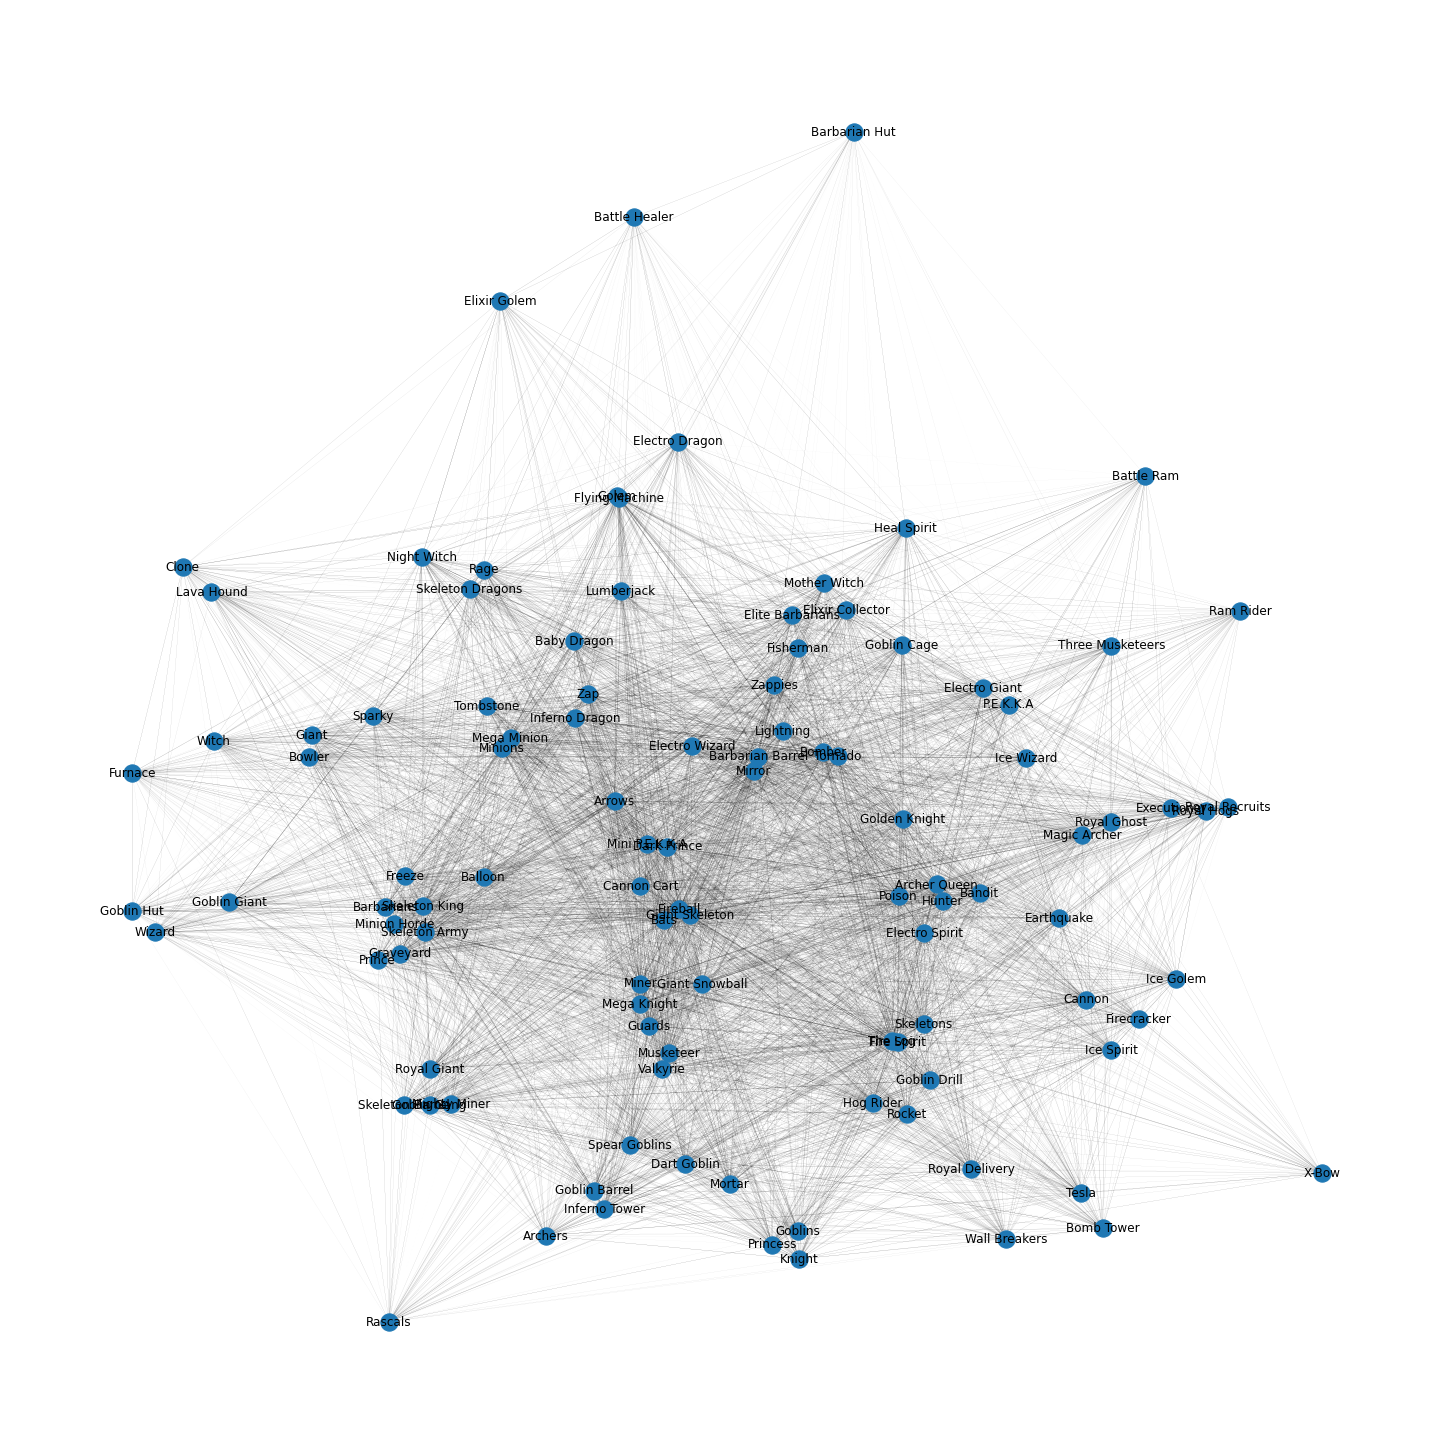

In [118]:
# new graph with new weights
G4 = nx.from_pandas_edgelist(rank_el, edge_attr='weight')
wts = np.array([i['weight'] for i in dict(G4.edges).values()])

# plotting
pl.figure(figsize=(20,20))
pos = nx.spring_layout(G4, iterations=50000)
nx.draw(G4, width=(wts/900), pos=pos, with_labels=True)